In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the data set
df = pd.read_csv('Airbnb.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# rename few columns for useres ease
rename_col ={
    'id': 'listing_id',
    'name' : 'listing_name',
    'number_of_reviews' : 'total_reviews',
    'calculated_host_listings_count': 'host_listings_count'
}

In [ ]:
# loading the columns / rename
df = df.rename(columns = rename_col)
df

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info

<bound method DataFrame.info of        listing_id                                       listing_name  \
0            2539                 Clean & quiet apt home by the park   
1            2595                              Skylit Midtown Castle   
2            3647                THE VILLAGE OF HARLEM....NEW YORK !   
3            3831                    Cozy Entire Floor of Brownstone   
4            5022   Entire Apt: Spacious Studio/Loft by central park   
...           ...                                                ...   
48890    36484665    Charming one bedroom - newly renovated rowhouse   
48891    36485057      Affordable room in Bushwick/East Williamsburg   
48892    36485431            Sunny Studio at Historical Neighborhood   
48893    36485609               43rd St. Time Square-cozy single bed   
48894    36487245  Trendy duplex in the very heart of Hell's Kitchen   

        host_id      host_name neighbourhood_group       neighbourhood  \
0          2787           Joh

In [ ]:

#to check the duplicates
df1 = df.duplicated().sum()
df1

0

In [ ]:
# tchecked duplicates and give the number of rows after remving duplicates
df= df.drop_duplicates()
df.count()

listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listings_count    48895
availability_365       48895
dtype: int64

In [ ]:
# checking null values
df.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [ ]:
#host_name and listing_name do nort have much null values with comparision to the
#other null value columns , so we are filling these columns with substitutes
df['listing_name'].fillna('unknown', inplace=True)
df['host_name'].fillna('no_name',inplace=True)

In [ ]:
# nulkl values are replaced
df[['host_name','listing_name']].isnull().sum()

host_name       0
listing_name    0
dtype: int64

In [ ]:
# dlast_review column is not needed for anlysis so dropping columns
df =df.drop(['last_review'],axis=1)

In [ ]:
#confirming above drop code
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48895 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48895 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  reviews_per_month    38843 non-null  float64
 13  host_listings_count  48895 non-null  int64  
 14  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(7), object(5)
m

In [ ]:
#whenever we have no of null values in a column and we require the column for aNALYSIS
#SO WE WILL replace it with o as integer type
df['reviews_per_month']= df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype=('int64')

In [ ]:
# check the dataset with updated columns,null values
df.sample()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
31912,24910361,"""The Little House by the Sea""",188328775,Donna,Queens,Neponsit,40.57043,-73.85821,Entire home/apt,200,2,7,int64,1,44


In [ ]:
# check unique value in variables
df['listing_id'].nunique()

48895

In [ ]:
df['neighbourhood_group'].nunique()

5

In [ ]:
df['host_name'].nunique()

11453

staistical Analysis / visualisation outliers


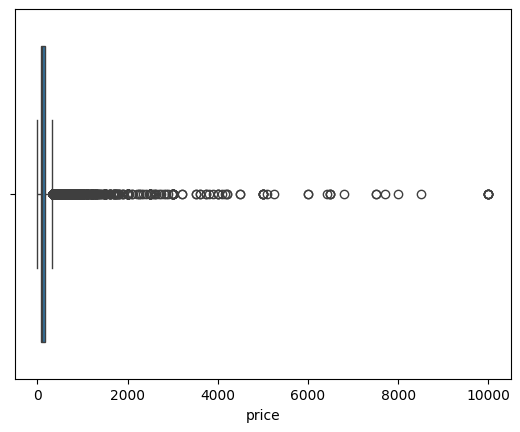

In [ ]:
#checking for outliers on an random column
sns.boxplot(x=df['price'])
plt.show()

In [ ]:
#IQR range technique using python method
# Creation of a a quartile by method using def keyword DFcolumn is an attribute
#used as a keyword inside method iqr_solution and q1 & q3 are paramteres
#that are stored within this method

def iqr_solution(DFcolumn):
  q1 = np.percentile(DFcolumn,25) # q1 is a quartile 25%
  q3 = np.percentile(DFcolumn,75) #q2 is quartile 75%
  iqr =q3-q1
  lower_range =q1 - (1.5 * iqr)
  upper_range= q3 + (1.5 * iqr)
  return lower_range, upper_range

In [ ]:
# will give respective output for particular column
lower_bound, upper_bound = iqr_solution(df['price'])
lower_bound

-90.0

In [ ]:
upper_bound

334.0

In [ ]:
#Lower_bound and upper _bound are objects created for upper fence and lower fence
# this below code has taken into consideration all the dat apart from outliers
lower_bound, upper_bound = iqr_solution( df['price'] )
df = df[(df.price > lower_bound)] & (df.price < upper_bound)

In [ ]:
# checking the box plot
sns.boxplot(x=df['price'])
plt.show()

In [ ]:
# using histogram we carry out the distribution for the price column
# we know histogram is used to  tell where the depth of data lies, volume, density
# and where data is present in dense format

plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid')

sns.distplot(df['price'],color='red')
plt.xlabel('Price',fontsize=14)
plt.ylabel('Density',fontsize=14)# sizes of x and y axis to be same always

plt.title('distribution of the Airbnb Pricing column', fontsize=15)



NameError: name 'df' is not defined

<Figure size 1200x500 with 0 Axes>